# Introduction to Data Visualization with Python
## Stephen Elston
### Presented at Symposium on Statistics and Data Science, Bellevue WA, May 2019  

Many statisticians are familiar with the data visualization tools in R, particularly the popular ggplot2 package. However, there is a general lack of awareness of the growing set of tools available in Python. This notebook gives statisticians a quick start with performing data visualization with the Python language. 

More specifically, this notebook provides an overview of the following topics:
1. The basics of scientific plotting using the **Matplotlib** package. 
2. Quick plotting with the **Pandas** data frame package.
3. Creating complex statistical charts with the **Seaborn** package. 


## About this Jupyter Notebook
This notebook contains material to help you learn how to explore data visually. This notebook and the data set can be downloaded from GitHub:

**https://github.com/Quantia-Analytics/DyDataSF2016Visualization**  

This notebook was constructed using the Anconda 3.7 Python distribution. Anaconda provides a convenient way to install a scientific Python tool stack. Once you have installed Anaconda you will be able to use many powerful Python data analysis packages. 

If you are not running version Anaconda 3.5 or higher, we suggest you update your Anaconda distribution now.  You can download the Python 3 Anaconda distribution for your operating system from the [Continum Analytics web site](https://www.continuum.io/downloads).

To run this notebook you need the Seaborn graphics packages. If you have not done so, you will need to install Seaborn as it is not in the Anaconda distribution as of now. From a command prompt on your computer type the following command. If no errors occur, you will have installed Seaborn.

``pip install seaborn``  

Or you can un-comment and run the code in the cell below. Make sure you leave the shell escape character `!`.

In [1]:
#!pip install seaborn


## About Me

These lessons have been prepared by:

**Steve Elston**

- Co-founder and principle consultant Quantia Analytics, LLC 
- Instructor, University of Washington and Harvard Extension School
- O'Reilly author and creator of seven edX data science and machine learning courses
- Decades of experience in predictive analytics and machine learning 
- Experience in several industries: payment, telecom, capital markets, logistics
- PhD, MS in Geophysics from Princeton University


## About the data set

This data set is from the [Univeristy of California Irving Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Automobile)  The data was compiled by Jeffrey C. Schlimmer from the following sources:

- 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 
- Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 
- Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037


## Resources

This tutorial only provides an introduction to the powerful Python plotting packages, Matplotlib, Pandas and Seaborn. These packages have extensive online documentation. There is an extensive tutorial on [**Visualizaton with Pandas**](http://pandas.pydata.org/pandas-docs/version/0.18.0/visualization.html).  The [**Seaborn tutorial**](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html) contains many examples of statistical data visualization. The matplotlib web site has addition [**resources for learning plotting with Python tools**](http://matplotlib.org/resources/index.html).

## Load and examine the data set

Let's get started. The function shown in the cell below loads the data from the .csv file. Some minimal clean up is performed on the data. Rows with missing values are dropped and some columns are converted from strings containing numbers to numeric data. 

Execute the code in this cell to load the data into your notebook. **Make sure you have the .csv file in your working directory!**

In [2]:
## Import some packages 
import matplotlib.pyplot as plt
import numpy
import numpy.random as nr
import pandas
import seaborn as sns
%matplotlib inline

In [3]:
tips = sns.load_dataset("tips")
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


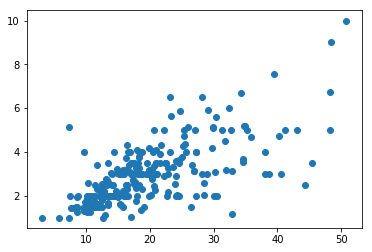

In [5]:
plt.scatter(x = tips.total_bill, y = tips.tip)

Text(0.5, 1.0, 'Tips vs. bill amount')

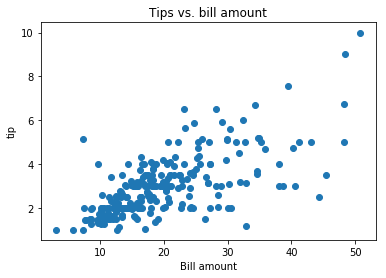

In [6]:
plt.scatter(x = tips.total_bill, y = tips.tip)
plt.xlabel('Bill amount')
plt.ylabel('tip')
plt.title('Tips vs. bill amount')

Text(0.5, 1.0, 'Tips vs. bill amount')

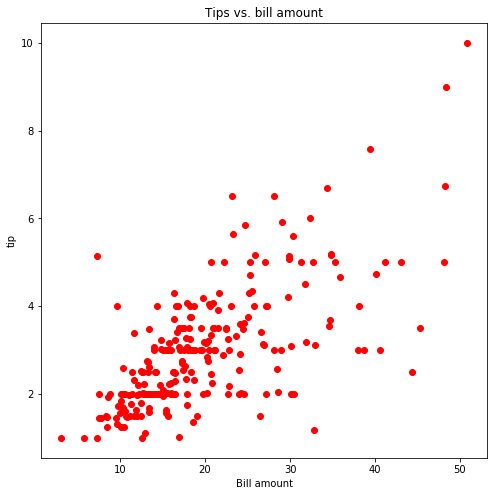

In [7]:
fig = plt.figure(figsize=(8, 8)) # define plot area
ax = fig.gca() # define axis        
ax.scatter(x = tips.total_bill, y = tips.tip, c = 'red')
ax.set_xlabel('Bill amount')
ax.set_ylabel('tip')
ax.set_title('Tips vs. bill amount')

## Basic chart types

Now that we have loaded and had a first look at the data, let's get to work making some charts. 

There are enumerable chart types that are used for data exploration. In this tutorial we focus on the most used chart types:

- **Scatter plot**
- **Line plots**
- **Bar plots**
- **Histograms**
- **Box plots**
- **Kernel Density Estimation Plots**
- **Violin plots**

### Scatter plots

Scatter plots show the relationship between two variables in the form of dots on the plot. In simple terms, the values along a horizontal axis are plotted against a vertical axis. 

The Pandas package contains a number of useful plot methods which operate on data frames. The simple recipe for plotting from Pandas data frames is:

- Use the plot method, specifing the ``kind`` argument, or use a chart-specific plot method.
- Specify the columns with the values for the ``x`` and ``y`` axes. 

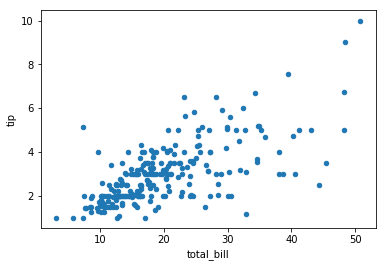

In [8]:
tips.plot.scatter(x = 'total_bill', y = 'tip')

Text(0.5, 1.0, 'Tips vs. bill amount')

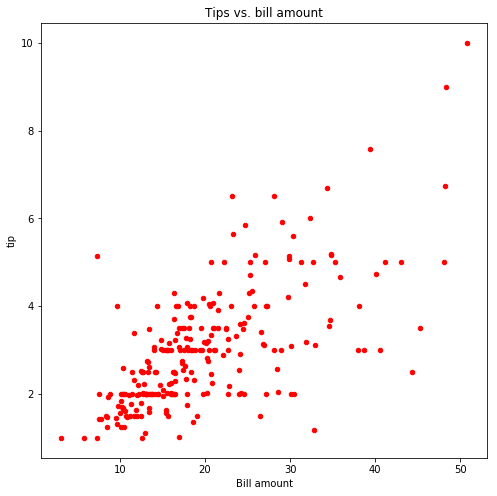

In [9]:
fig = plt.figure(figsize=(8, 8)) # define plot area
ax = fig.gca() # define axis       
tips.plot.scatter(x = 'total_bill', y = 'tip', ax = ax, c = 'red')
ax.set_xlabel('Bill amount')
ax.set_ylabel('tip')
ax.set_title('Tips vs. bill amount')

Our basic recipe worked, but it does not give us much control over the result. 

We take advantage of the fact that Pandas plot methods are built on matplotlib. Thus, we can specify a figure and one or more axes within that figure. We can control many plot attributes once we have specified the axes. Our improved recipe looks like this:

- Specify a figure, including a size.
- Define one or more axes within the figure.
- Use the pandas plot method of choice. Make sure you specify the axis you are using. 
- Use methods on the axes to control attributes like titles and axis labels. 

In the plot above, we can see that the most costly cars have the lowest fuel efficiency, whereas relatively inexpensive cars are also more economical to drive. 




### Histograms

Histograms are related to bar plots. Histograms are used for numeric variables. Whereas, a bar plot shows the counts of unique categories, a histogram shows the number of data with values within a bin. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.  

The code below follows our same basic recipe to create a histogram of ``engine-size``. Notice however, that the column of the data frame we wish to plot is specified by name as ``auto_prices['engine-size']``.

Text(0, 0.5, 'Count')

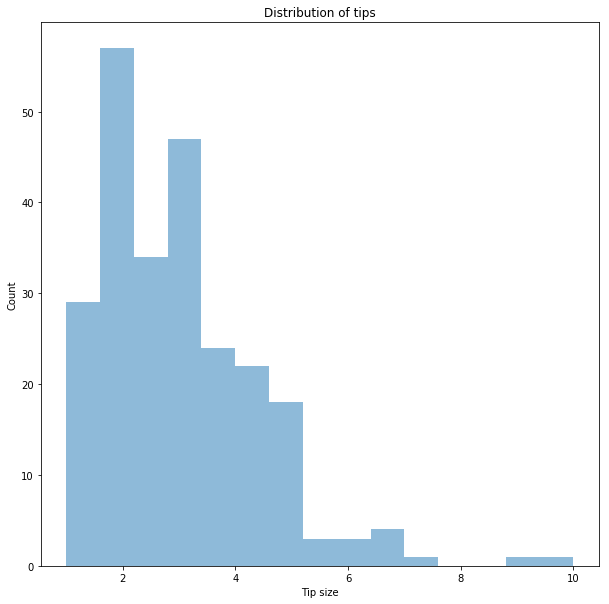

In [11]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
tips['tip'].plot.hist(ax = ax, alpha = 0.5, bins = 15) # Use the plot.hist method on subset of the data frame
ax.set_title('Distribution of tips') # Give the plot a main title
ax.set_xlabel('Tip size') # Set text for the x axis
ax.set_ylabel('Count')# Set text for y axis

The histogram shows that the distibution of engine size is skewed toward small engines. There are also a few autos with very large engines, which appear as outliers. 

### Box plots

Box plots, also known as box and wisker plots, were introduced by John Tukey in 1970. Box plots are another way to visualize the distribution of data values. In this respect, box plots are comparable to histograms, but are quite different in presentation. 

On a box plot the median value is shown with a dark bar. The inner two qartiles of data values are contained within the 'box'. The 'wiskers' enclose the majority of the data. Outliers are shown by symbols byond the wiskers.

Several box plots can be stacked along an axis. The data are divided using a 'group by' operation, and the box plots for each group are stacked next to each other. In this way, the box plot allows you to display two dimensions of your data set. 

The code in the cell below generally follows the recipe we have been using. The data frame is subsetted to two columns. One column contains the numeric values to plot and the other column is the group by variable. In this case, the group by variable is specified with the ``by = 'fuel-type'`` argument. 

Text(0, 0.5, 'Total bill')

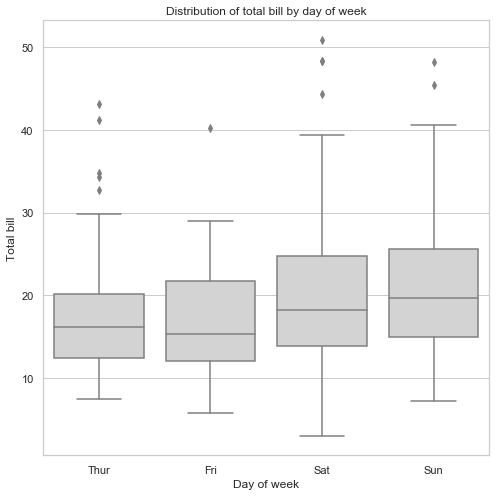

In [41]:
fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis    
sns.set(style="whitegrid")
sns.boxplot(x = 'day', y = "total_bill", data = tips, ax = ax, color = "lightgray")
ax.set_title('Distribution of total bill by day of week') # Give the plot a main title
ax.set_xlabel('Day of week') # Set text for the x axis
ax.set_ylabel('Total bill')# Set text for y axis

Examine the plot above and notice the differences in the distribution of engine size by fuel type. There is considerable overlap in the inter-quartile range (the range within the boxes), with gas cars having generally smaller engines. The median engine size (the red bar) for gas cars is noticeably lower than for diesel cars. However, the range of engine sizes for gas cars is greater, including a few outliers. It is likely, these are the outliers we saw in the histogram. 

### Kernel density plots and introduction to Seaborn

Up until now we have been working exclusively with the plotting methods in pandas. We will now start working with the Seaborn package.  Seaborn is a newer Python package which abstracts lower level matplotlib charts. Saborn also includes some additional cutting-edge chart types.

If you have not done so, you will need to install Seaborn as it is not in the Anaconda distribution as of now. From a command prompt on your computer, type the following command. If no errors occur, you will have installed Seaborn. 

``pip install seaborn``

 Kernel density plots are similar in concept to a histogram. A kernel density plot displays the values of a smoothed density curve of the data values. In other words, the kernel density plot is a smoothed version of a histogram.
 
 The code in the cell below creates a violin plot using the following recipe:
 
 - Import the Seaborn package,
 - Set a style for the plot grid.
 - Define the ``kdeplot`` of the engine-size column.
 
 ****
 **Note:** Depending on your platform and versions of Numpy, you may see a deprication warning. You can safely ignore this warning. 
 ****

C:\Users\StevePC2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


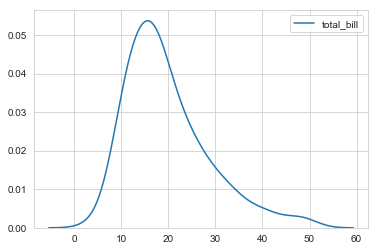

In [12]:
import seaborn as sns
sns.set_style("whitegrid")
sns.kdeplot(data = tips['total_bill'])

The KDE plot results are similar to what we observed with the histogram of engine size. Engine size is skewed toward the small size, and there are outliers of a few cars with large engines clearly visible. 

As we did with pandas plots, we control the properties of a Seaborn plot by specifing axes. The code in the cell below extends our simple recipe for Seaborn plots:

- Define a figure.
- Define one or more axes on the figure.
- Set a style for the plot grid.
- Define the ``kdeplot`` of the engine-size column.
- Use methods on the axes to control attributes like titles and axis labels.

C:\Users\StevePC2\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\StevePC2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Total bill')

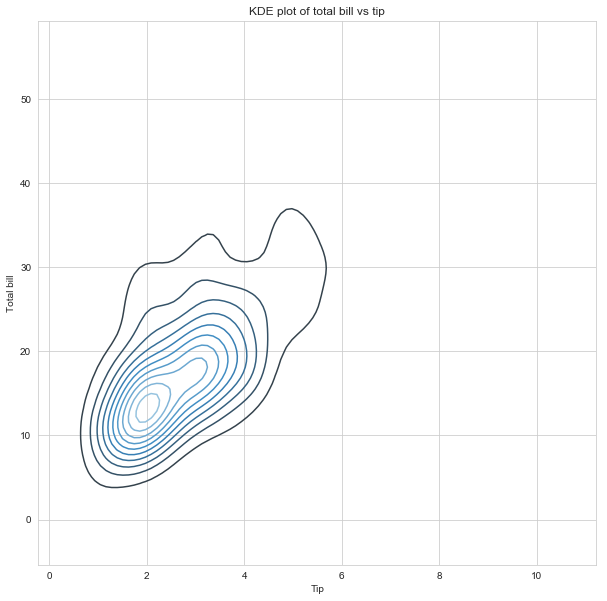

In [13]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(tips[['tip', 'total_bill']], ax = ax, cmap="Blues_d")
ax.set_title('KDE plot of total bill vs tip') # Give the plot a main title
ax.set_xlabel('Tip') # Set text for the x axis
ax.set_ylabel('Total bill')# Set text for y axis

C:\Users\StevePC2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Total bill')

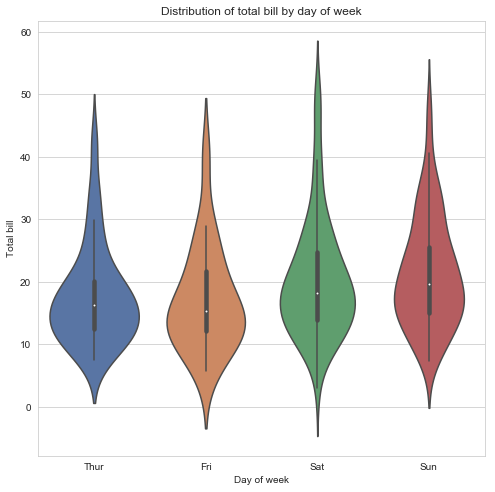

In [14]:
fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis    
sns.set(style="whitegrid")
sns.violinplot(x = 'day', y = "total_bill", data = tips, ax = ax)
ax.set_title('Distribution of total bill by day of week') # Give the plot a main title
ax.set_xlabel('Day of week') # Set text for the x axis
ax.set_ylabel('Total bill')# Set text for y axis

We can clearly see that there is a single strong mode for both auto price and engine size. There is a skew of both variables toward lower cost cars with smaller engines. 

### Violin plots

Next, we will use Seaborn to create a violin plot. A violin plot combines attributes of boxplots and a kernel density estimation plot. Like a box plot, the violin plots can be stacked, with a group by operation. However, the violin plot provides a kernel density estimate for each group. As with the box plot, violin plots allow you to display two dimensions of your data set.

The code in the cell below follows the recipe we have laid out for Seaborn plotting. The ``sns.violinplot`` method has more arguments than the kdeplot method. 

- The columns used for the plot are set with the ``x`` and ``y`` arguments. 
- The ``x`` column is the group by variable.
- The ``data`` argument specifies a pandas data frame or a numpy array.

C:\Users\StevePC2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Total bill')

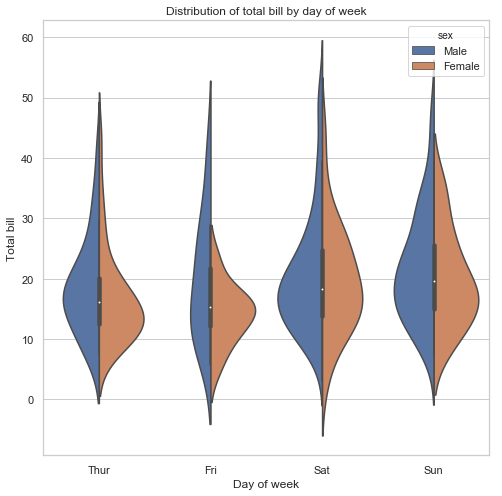

In [15]:
fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis    
sns.set(style="whitegrid")
sns.violinplot(x = 'day', y = "total_bill", hue = 'sex', split = True, data = tips, ax = ax)
ax.set_title('Distribution of total bill by day of week') # Give the plot a main title
ax.set_xlabel('Day of week') # Set text for the x axis
ax.set_ylabel('Total bill')# Set text for y axis

The differences in the distribution of engine sizes between gas and diesel cars are clearly visible in the violin plots. We can confirm that the engine size of gas cars is skewed to the small size. There are some gas cars with very small engine sizes and a number of autos that appear as outliers with large engines. The distibution of diesel engine sizes is more uniform. 

## Viewing multiple dimensions with aesthetics

We have now explored some basic plot types. All the plots we have created so far are projected onto a two dimensional surface. Thus, we have been limited to visualization of only two dimensions of our data set. 

Now, we will use plot aesthetics to view additional dimensions of the data set. Specific aesthetics are used to project additonal dimensions onto a two dimensional plot surface. Additionally, carefull choice of plot aesthetics can highlight certain aspects of a data set you are exploring.   

There are many possible aesthetics one can use for visualization. Specific examples we will work with here include:

- Color
- Transparency
- Size
- Marker shape
- Aesthetics specific to plot type

Using aesthetics with a bit of cleverness can lead to interesting insights about a data set. Don't over do it! Too many colors, shapes and sizes can be confusing, obfuscating rather than enlightening. 

### Color

Color can be used to view an additional dimension on a scatter plot. A categorical factor can be shown using different colors for the different categories. 

*****
**Caution!** Make sure you use choose a palette with distinctive colors for each cateogry. Too many categories using similar colors are invariably hard to see and imposible to interpret. 
****

The code in the cell below uses the ``hue`` argument to add a third dimension, ``fuel-type`` to a scatter plot. A color palette is also specified. 

C:\Users\StevePC2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(32.788723046875006, 0.5, 'Tip')

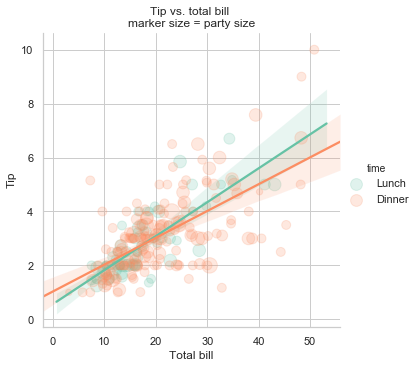

In [16]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = "time", palette="Set2", scatter_kws={'alpha':0.2, 's':40*tips['size']})     
plt.title('Tip vs. total bill \nmarker size = party size') # Give the plot a main title
plt.xlabel('Total bill') # Set text for the x axis
plt.ylabel('Tip')# Set text for y axis

In the above plot we can see that a diesel car is generally more costly at a given fuel efficiency. We can also see that all of the least efficient and most expensive cars have gas engines. 

If we are willing to create more code, we can gain a great deal more control over plot aesthetics. The code in the function shown below divides the data into subsets and plots them with different aesthetics on the same set of axes. The recipe is:

- Import the required packages
- Loop over a list of column names for the horizontal axis. In this example we only specify one.
- Define a figure and axes for the plot
- Subset the data by ``gas`` and ``diesel`` cars.
- If the subset has more than zero members create scatter plots with the aesthetics defined. In this case, the attribute is color defined as either ``DarkBlue`` or ``Red``.
- Create a list of patches and display the patches for the ledgend. 

The above scatter plot is similar to the previous one. Notice that the colors are more distinctive. A similar effect can be achieved with Seaborn plots by choosing another color palette. 

### Transparency

In the scatter plot above, notice there are areas on the plot with dense clusters of points. In particular, there are overlapping points for gas cars with city mpg between 19 and 31 (mpg is apparently reported in integer units). 

Because of the 'over-plotting' effect is hard to see just how many cars are represented in some regions of the plot. Transparency, is a useful aesthetic to overcome over-plotting. Transparency is defined on a scale from 0 (completely transparent, or invisible) to 1 (perfectly opaque). By choosing reasonable transparency values, you can get a feel for how many points are clustered in a small area of a plot. 

The code in the cell below follows the aforementioned recipe. A transparency argument, ``alpha``, has been added. 

### Using marker size

Another aesthetic which can project an additional dimension onto a two dimensional plot is marker size. The code in the cell below uses the scaled size of the marker to indicate engine size. 

Examine the above plot. Notice that the differences in engine size are much more apparent when we use area to determine marker size. 

### Using marker shapes

Marker shape can be used to project an additonal dimension onto a two dimensional plotting surface. Typically, different marker shapes are used to indicate the categories of a categorical variable. As with other aesthetics, don't over do it. Too many similar markers on a chart will only obfuscate the relationships you are trying to show. 

The code in the cell below uses different marker shapes to indicate standard and turbo aspiration cars. 

## Multi-axis and Facet Plots

We have explored basic plot types and using aesthetics to project multiple dimensions onto basic plot types. Now we will investige the use of multiple plot axes and of a technique known as faceting. Faceting involves using values of categorical or numeric variables to create a systematic grid of related plots. Faceting goes by several other monikers, including conditioned plotting or lattice plotting. 

We will now explore several aspects of these: 

- Pair plots with marginal density
- Pairwise scatter plots
- Multi-axes plots
- Faceted plots



There is a great deal of information on the above plot. Examine this plot, noticing at least the following:

- There are KDE plots grouped by fuel type for each of the variables specified. 
- Autos with larger length, curb weight, engine size, and horse power are more expensive.
- Cars with higher curb weights tend to be longer and have larger engines. 
- Longer, heavier cars, have larger engines, or more horsepower and are less fuel efficient.  

### Multi-axis plots

In a previous exercise you created a first plot with multiple sets of axes. We will now extend this concept to a two dimensional array of axes. Data plotted in each cell on the grid can be subsetted or grouped by one or more variables. Thus, the two dimensional grid is a method for projecting at least two additonal dimensions of the data set onto the two dimensional plot surface.  

The function defined in the cell below creates a two dimensional array of histograms. The recipe for this function is:

- Define four arguments for the funciton, the pandas data frame, the column to plot in the histograms, the variable to group by in the horizontal direction and the varible to group by in the vertical direction. 
- A figure with a 2x2 array of axes is defined.
- The unique values of the x and y axes group by variables are obtained.
- A pair of loops interate over the unique values of the x and y axes group by variables.
- The data are subset by the values of the x and y axes group by variables, and the plot method exectued. Note a single element of the axes array is used for each plot.
- Other attributes are defined for the axes set being plotted.  

Examine these plots and notice the following:
 - The price of standard aspiration cars is skewed to the low end.
 - The price of turbo aspriation cars is fairly uniform over a wide range. 


### Facet plots

We created the previous plots by explicitly defining the axes array. The Seaborn package allows us to create the same time of faceted plots with much less code, but with a bit less control. The code in the cell below does just this, following this recipe:

- A ``FacetGrid`` is defined for the data set. In this case we have only one facet (group by variable), across columns. 
- The ``map`` method is applied to the facet grid with a plot type specified.
- In this case, the the plot type uses the ``regplot`` method to create a scatter plot. 

C:\Users\StevePC2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


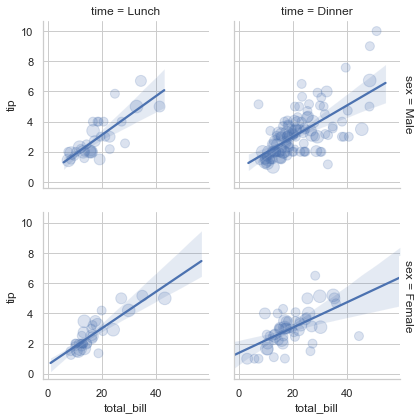

In [31]:
g = sns.FacetGrid(tips, col="time", row = 'sex', margin_titles=True)
g.map(sns.regplot, "total_bill", "tip", scatter_kws={'alpha':0.2, 's':40*tips['size']})

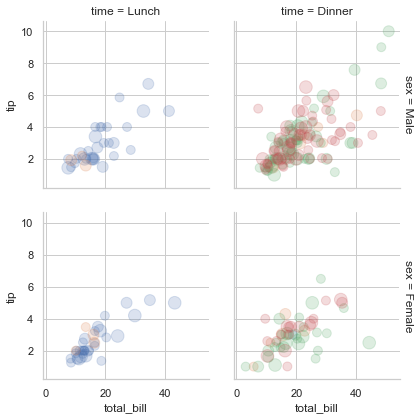

In [33]:
g = sns.FacetGrid(tips, col="time", row = 'sex', hue = "day", margin_titles=True)
g.map(sns.regplot, "total_bill", "tip", scatter_kws={'alpha':0.2, 's':40*tips['size']}, fit_reg = False)

## Summary

We have covered a lot of ground in this tutorial. We have learned quite a bit about the relationships in the auto price data set by creating multiple views to visualize these data. 

Specifically, in this tutoral we have:

- Examined the uses of and methods for creation of several basic plot types.
- Used plot aesthetics to project additional dimensions onto a two dimensional plot surface, or to highlight aspects of the relationships in the data.
- Used multi-axis and faceted plots to project additional dimensions onto the two dimensional plot surface. 

Finally, **have fun exploring your data!**